In [129]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

images_dir = 'images'

In [142]:

df = pandas.read_csv(
    'results.csv', delimiter=';', 
    index_col=False,
    names=['time', 'filename', 'rows', 'strategy', 'nSim', 'piecesPlaced', 'solution_found', 'depth'])

# correct incorrectly recorded depth when score reached
df.loc[df['solution_found'] == 1, 'depth'] = df['rows'] * df['rows'] 

In [143]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth
0,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
1,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
2,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
3,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
4,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6
...,...,...,...,...,...,...,...,...
1793,20-05-12 19:26:35,puzzles_set/RandPuzzle9x9_05.txt,9,maxDepth,10000,14518680,0,58
1794,20-05-12 19:40:08,puzzles_set/RandPuzzle9x9_05.txt,9,maxDepth,10000,10249412,0,42
1795,20-05-12 19:58:03,puzzles_set/RandPuzzle9x9_05.txt,9,avgDepth,10000,13929671,0,34
1796,20-05-12 20:11:27,puzzles_set/RandPuzzle9x9_05.txt,9,avgDepth,10000,9846802,0,15


In [144]:

df['pieces'] = df['rows'] * df['rows']

In [145]:
df['score'] = df['depth'] / df['pieces']

In [146]:
df

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
1,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
2,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
3,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
4,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
...,...,...,...,...,...,...,...,...,...,...
1793,20-05-12 19:26:35,puzzles_set/RandPuzzle9x9_05.txt,9,maxDepth,10000,14518680,0,58,81,0.716049
1794,20-05-12 19:40:08,puzzles_set/RandPuzzle9x9_05.txt,9,maxDepth,10000,10249412,0,42,81,0.518519
1795,20-05-12 19:58:03,puzzles_set/RandPuzzle9x9_05.txt,9,avgDepth,10000,13929671,0,34,81,0.419753
1796,20-05-12 20:11:27,puzzles_set/RandPuzzle9x9_05.txt,9,avgDepth,10000,9846802,0,15,81,0.185185


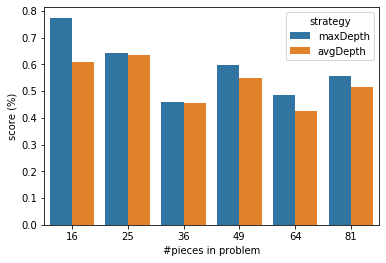

In [147]:
ax = sns.barplot(x='pieces', y='score', hue='strategy', data=df, ci=None)
ax.set(xlabel='#pieces in problem', ylabel='score (%)')
plt.savefig(images_dir + '/pieces_vs_score.png')
plt.show()

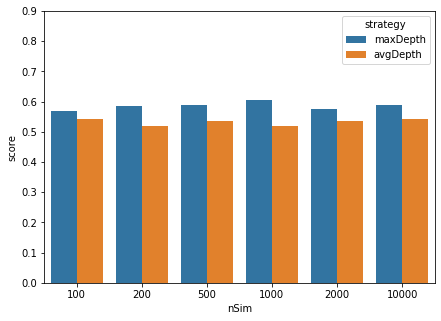

In [148]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x='nSim', y='score', hue='strategy', data=df, ci=None)

ax.set(ylim=[0, 0.9])
plt.savefig(images_dir + '/max_vs_avg.png')

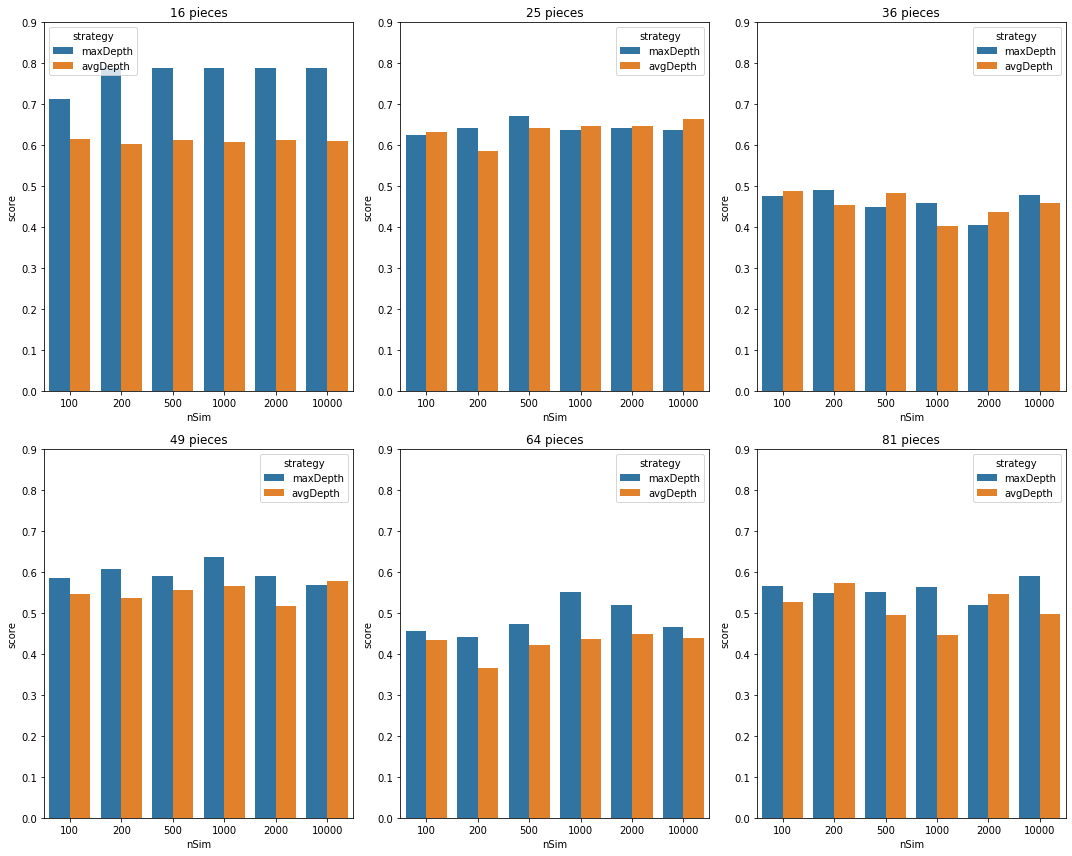

In [149]:
cols = 3
f, axes = plt.subplots(2, cols, figsize=(15, 12))
for i, pieces in enumerate(sorted(list(set(df['pieces'])))):
    _df = df[df['pieces'] == pieces]
    ax = sns.barplot(x='nSim', y='score', hue='strategy', data=_df, ci=None, ax=axes[i // cols][i %cols])
    ax.set_title(f"{pieces} pieces")
    ax.set(ylim=[0, 0.9])
# f.delaxes(axes[1, 2])
f.tight_layout()
plt.savefig(images_dir + '/n_sim_per_different_problems.png')
plt.show()
    

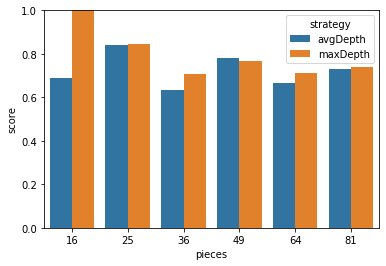

In [154]:
# get max value 
max_scores = df.groupby(['strategy', 'nSim', 'pieces']).agg({'score': 'max'}).reset_index()
ax = sns.barplot(x='pieces', y='score', hue='strategy', data=max_scores, ci=None)

ax.set(ylim=[0, 1.0])
plt.savefig(images_dir + '/maximum_values.png')

In [151]:
import pandas as pd
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(max_scores)

,strategy,nSim,pieces,score
0,avgDepth,100,16,0.687500
1,avgDepth,100,25,0.840000
2,avgDepth,100,36,0.611111
3,avgDepth,100,49,0.795918
4,avgDepth,100,64,0.671875
5,avgDepth,100,81,0.691358
6,avgDepth,200,16,0.687500
7,avgDepth,200,25,0.840000
8,avgDepth,200,36,0.722222
9,avgDepth,200,49,0.775510


In [152]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,time,filename,rows,strategy,nSim,piecesPlaced,solution_found,depth,pieces,score
0,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
1,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
2,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
3,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
4,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,maxDepth,100,3895,0,6,16,0.375000
5,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,avgDepth,100,6430,0,11,16,0.687500
6,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,avgDepth,100,6430,0,11,16,0.687500
7,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,avgDepth,100,6430,0,11,16,0.687500
8,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,avgDepth,100,6430,0,11,16,0.687500
9,20-05-11 09:54:55,puzzles_set/RandPuzzle4x4_01.txt,4,avgDepth,100,6430,0,11,16,0.687500
